In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, precision_score, precision_recall_curve, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, normalize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.base import TransformerMixin
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as IMBPipeline
from scipy.sparse import hstack

In [51]:
df = pd.read_csv('new_train2.csv')

In [52]:
# Preprocess
# df['label'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
# del df['y']

# df = df[(df['housing'] != 'unknown') & (df['loan'] != 'unknown') & (df['marital'] != 'unknown')]

# X = df.iloc[:, 0:-1]
# y = df.iloc[:, -1]

df['label'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
del df['y']

X = df.drop('label', axis=1)
y = df['label']

In [53]:
# categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
# numerical_features = ['age', 'duration', 'campaign']

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),
#         ('cat', OneHotEncoder(sparse=False), categorical_features)  # Set sparse=False
#     ])

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_features = ['age', 'duration', 'campaign']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse=False), categorical_features)  # Set sparse=False
    ])

In [54]:
# # Models
# models = [
#     (LogisticRegression(solver='liblinear', max_iter=1000), "Logistic Regression"),
#     (KNeighborsClassifier(), "KNN"),
#     (GaussianNB(), "Naive Bayes"),
#     (DecisionTreeClassifier(), "Decision Tree"),
#     (RandomForestClassifier(), "Random Forest"),
# ]

# Models
models = [
    (LogisticRegression(solver='liblinear', max_iter=1000), "Logistic Regression"),
    (KNeighborsClassifier(), "KNN"),
    (GaussianNB(), "Naive Bayes"),
    (DecisionTreeClassifier(), "Decision Tree"),
    (RandomForestClassifier(), "Random Forest"),
#     (SVC(probability=True), "SVM"),
#     (LinearDiscriminantAnalysis(), "Linear Discriminant Analysis")
]

In [55]:
# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output`

Cross-Validation Accuracy for Logistic Regression: 0.9018 ± 0.0015
Test Accuracy for Logistic Regression: 0.9013
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8768
           1       0.61      0.34      0.44      1119

    accuracy                           0.90      9887
   macro avg       0.77      0.66      0.69      9887
weighted avg       0.89      0.90      0.89      9887



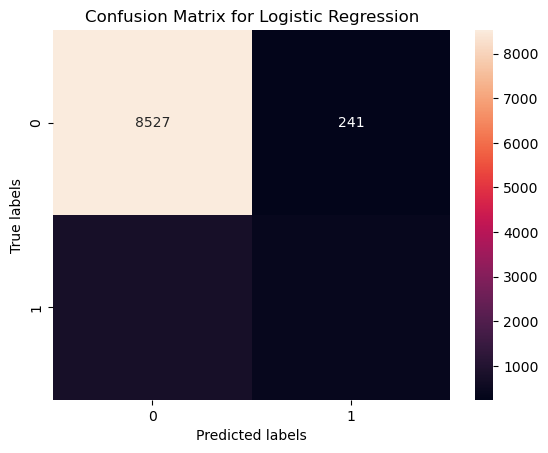

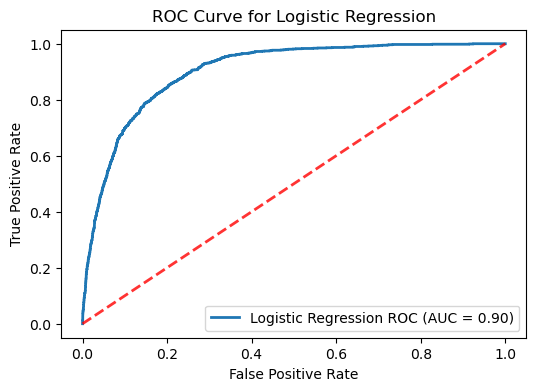

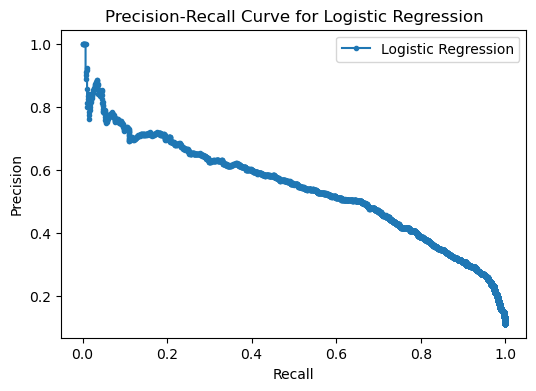

/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output`

Cross-Validation Accuracy for KNN: 0.8885 ± 0.0019
Test Accuracy for KNN: 0.8918
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8768
           1       0.55      0.26      0.35      1119

    accuracy                           0.89      9887
   macro avg       0.73      0.61      0.65      9887
weighted avg       0.87      0.89      0.87      9887



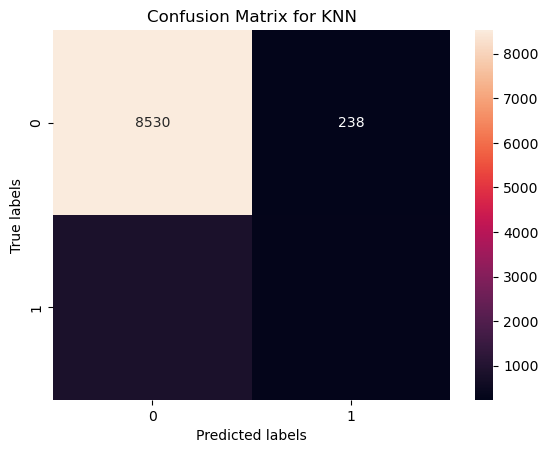

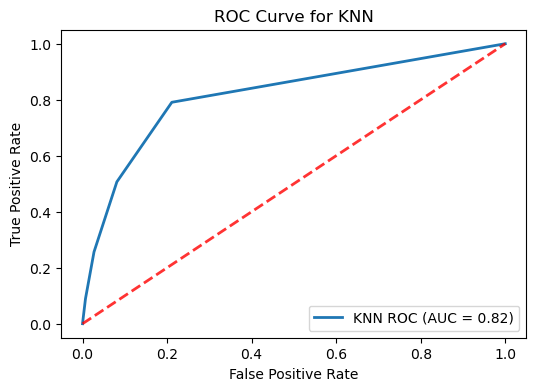

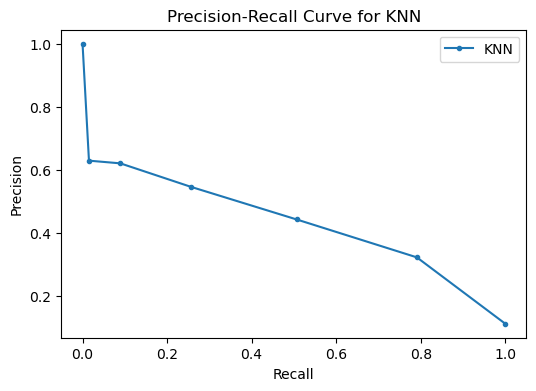

/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output`

Cross-Validation Accuracy for Naive Bayes: 0.7991 ± 0.0068
Test Accuracy for Naive Bayes: 0.8035
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      8768
           1       0.32      0.66      0.43      1119

    accuracy                           0.80      9887
   macro avg       0.64      0.74      0.66      9887
weighted avg       0.88      0.80      0.83      9887



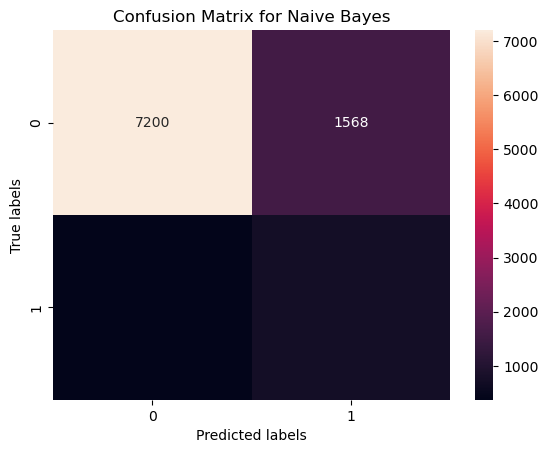

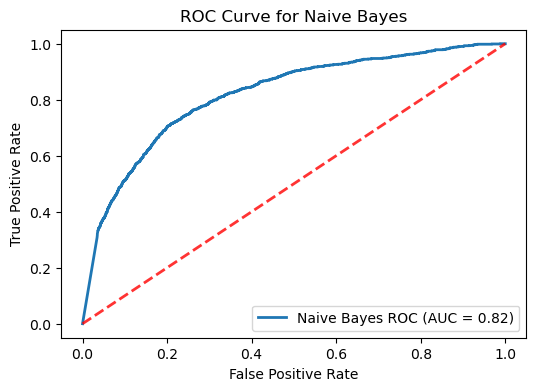

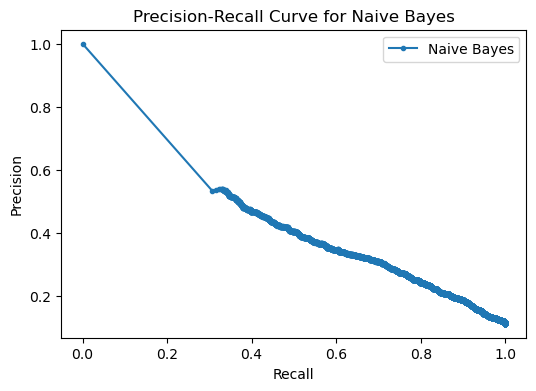

/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output`

Cross-Validation Accuracy for Decision Tree: 0.8720 ± 0.0024
Test Accuracy for Decision Tree: 0.8732
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      8768
           1       0.44      0.48      0.46      1119

    accuracy                           0.87      9887
   macro avg       0.69      0.70      0.69      9887
weighted avg       0.88      0.87      0.88      9887



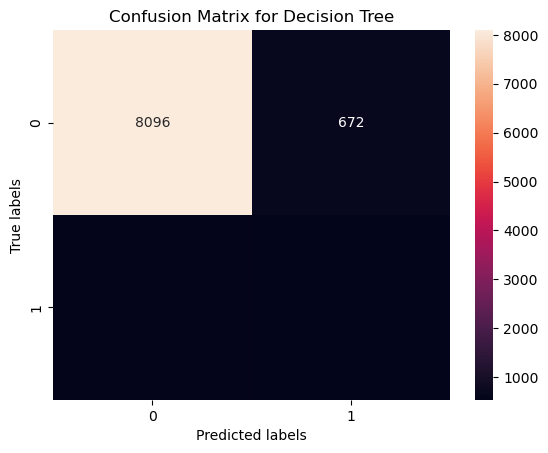

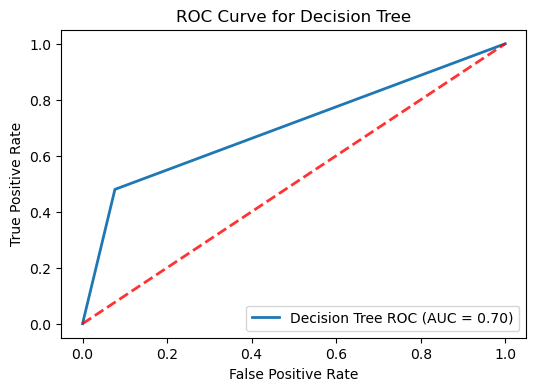

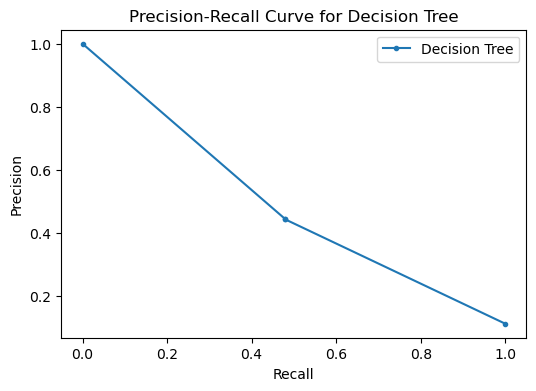

/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/xiaolan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output`

Cross-Validation Accuracy for Random Forest: 0.9002 ± 0.0037
Test Accuracy for Random Forest: 0.9034
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8768
           1       0.62      0.39      0.48      1119

    accuracy                           0.90      9887
   macro avg       0.77      0.68      0.71      9887
weighted avg       0.89      0.90      0.89      9887



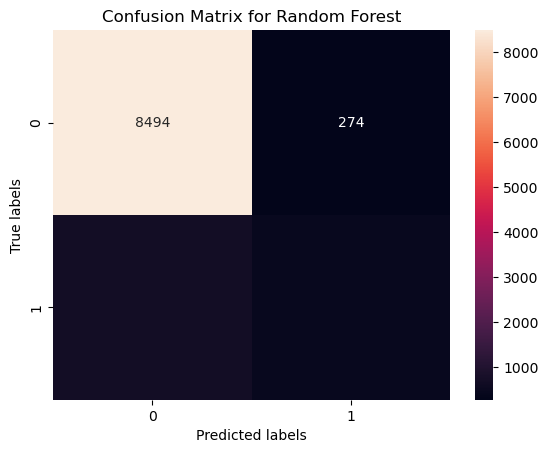

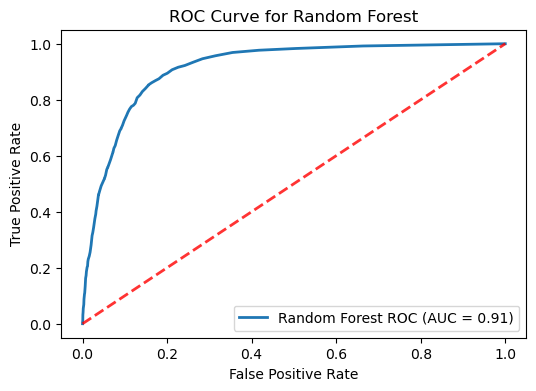

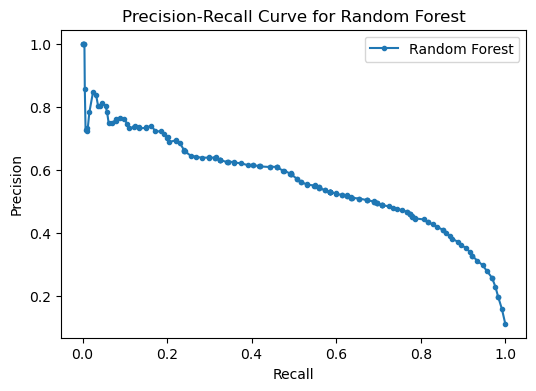

In [56]:
# # Train, validate, and testing
# for model, name in models:
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    
#     # Training 
#     pipeline.fit(X_train, y_train)
    
#     # Validate: cross-validation
#     cv_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
#     print(f"Cross-Validation Accuracy for {name}: {np.mean(cv_score):.4f} ± {np.std(cv_score):.4f}")
    
#     # Testing
#     y_pred = pipeline.predict(X_test)
#     print(f"Test Accuracy for {name}: {accuracy_score(y_test, y_pred):.4f}")
    
#     # Classification report
#     print(f"Classification Report for {name}:")
#     print(classification_report(y_test, y_pred))
    
#     # Confusion matrix
# #     cm = confusion_matrix(y_test, y_pred)
# #     plt.figure(figsize=(6, 4))
# #     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# #     plt.xlabel('Predicted labels')
# #     plt.ylabel('True labels')
# #     plt.title(f'Confusion Matrix for {name}')
# #     plt.show()
    
#     cm = confusion_matrix(y_test, y_pred)
#     sns.heatmap(cm, annot=True, fmt='d')
#     plt.xlabel('Predicted labels')
#     plt.ylabel('True labels')
#     plt.title(f'Confusion Matrix for {name}')
#     plt.show()
    
#     # ROC curve
#     probas_ = pipeline.predict_proba(X_test)[:, 1]
#     fpr, tpr, thresholds = roc_curve(y_test, probas_)
#     roc_auc = auc(fpr, tpr)
    
#     plt.figure(figsize=(6, 4))
#     plt.plot(fpr, tpr, label=f'{name} ROC (AUC = {roc_auc:.2f})', lw=2)
#     plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(f'ROC Curve for {name}')
#     plt.legend(loc="lower right")
#     plt.show()
    
#     # Precision Recall curve
#     precision, recall, _ = precision_recall_curve(y_test, probas_)
    
#     plt.figure(figsize=(6, 4))
#     plt.plot(recall, precision, marker='.', label=name)
#     plt.xlabel('Recall')
#     plt.ylabel('Precision')
#     plt.title(f'Precision-Recall Curve for {name}')
#     plt.legend()
#     plt.show()

# Train, validate, and testing
for model, name in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    
    # Training 
    pipeline.fit(X_train, y_train)
    
    # Validate: cross-validation
    cv_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy for {name}: {np.mean(cv_score):.4f} ± {np.std(cv_score):.4f}")
    
    # Testing
    y_pred = pipeline.predict(X_test)
    print(f"Test Accuracy for {name}: {accuracy_score(y_test, y_pred):.4f}")
    
    # Classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
#     plt.figure(figsize=(6, 4))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
#     plt.xlabel('Predicted labels')
#     plt.ylabel('True labels')
#     plt.title(f'Confusion Matrix for {name}')
#     plt.show()
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    # ROC curve
    probas_ = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probas_)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{name} ROC (AUC = {roc_auc:.2f})', lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Precision Recall curve
    precision, recall, _ = precision_recall_curve(y_test, probas_)
    
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, marker='.', label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {name}')
    plt.legend()
    plt.show()